In [1]:
!pip install pandasql

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("7003_1.csv")
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
df.head()

C:\Users\BenhamAaron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,36,39,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,asins,brand,...,upc,websiteIDs,weight
0,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
1,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
2,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
3,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
4,AVpfEqFRLJeJML431x7w,NaN,Wild Pair,...,7.63181E+11,NaN,NaN


# CLEANING

In [77]:
df = df[[
    "id",
    "brand",
    "categories",
    "colors",
    "descriptions",
    "features",
    "merchants",
    "name",
    "prices.amountMax",
    "prices.currency",
    "prices.merchant",
    "sizes",
]]
df.head()

,id,brand,categories,...,prices.currency,prices.merchant,sizes
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,NaN,"10,9"
1,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,9"
2,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,9"
3,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,9"
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",...,USD,NaN,"8.5,7,7.5,8"


In [78]:
df = df.drop_duplicates(subset=["id"])
df.head()

,id,brand,categories,...,prices.currency,prices.merchant,sizes
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,NaN,"10,9"
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",...,USD,NaN,"8.5,7,7.5,8"
7,AVpfFCfi1cnluZ0-dcCZ,Sutton Studio,"Women's Suits & Sets,Women's Clothing,All Wome...",...,USD,Sears.com,8
9,AVpfBZCAilAPnD_xTN_K,LaLeela.com,"Women's Clothing,All Women's Clothing,Clothing...",...,USD,La Leela,NaN
11,AVpfHscY1cnluZ0-eVb6,Reebok,"Shoes,Clothing,Women's Shoes,All Women's Shoes...",...,USD,ApparelSave - Walmart.com,"5.5M,6.5M,7M,7.5M,8.5M,6M,11M,9M,10M,8M,9.5M,5..."


# ANALYSIS

## Brands

top brands for women (count):
    1. nike
    2. toms
    3. pleaserusa
    4. nine west
    5. easy spirit
    6. vans
    
top brands for men (count):
    1. nike
    2. puma
    3. reebok
    4. vans
    5. adidas
    6. (no data)
    7. new balance

In [92]:
top_women_brands = ["nike", "toms", "pleaserusa", "nine west", "easy spirit", "vans"]
top_brand_df = df.query(f'brand.str.lower() == {top_women_brands}')
top_brand_df

,id,brand,categories,...,prices.currency,prices.merchant,sizes
34,AVpfFTVk1cnluZ0-diFm,Nine West,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,NaN,"10.5,10,8.5,7,6,5,9.5,6.5,7.5,9,8"
43,AVpfDvKDilAPnD_xUBPs,Easy Spirit,"Clothing,Shoes,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"6,10,11,7.5,8"
73,AVpfErj_1cnluZ0-dT5t,Easy Spirit,"Women's Sandals,Shoes,Women's Shoes,Clothing",...,USD,ShoeFabs - Walmart.com,"8.5,10,9.5,6.5,7.5,8,11"
94,AVpfEsduLJeJML431ywi,Nike,"Women's Athletic Shoes,Shoes,Clothing,Women's ...",...,USD,New York Deals - Walmart.com,"10,8.5,7,7.5,9,8"
125,AVpfEoof1cnluZ0-dS6t,PleaserUSA,"Women's Sandals,Shoes,Women's Shoes,Clothing",...,USD,Costumes4less.com - Walmart.com,NaN
...,...,...,...,...,...,...,...
18830,AVpffLjH1cnluZ0-lmKh,Nike,"Women's Athletic Shoes,Shoes,Women's Shoes,Clo...",...,USD,shoezoo - Walmart.com,NaN
18849,AVpfvGfE1cnluZ0-qV0i,VANS,"Shoes,Women's Shoes,Clothing,All Women's Shoes",...,USD,ApparelSave - Walmart.com,7.5
18888,AVpff_ck1cnluZ0-l1by,Easy Spirit,"Women's Casual Shoes,Shoes,Women's Shoes,Clothing",...,USD,ShoeFabs - Walmart.com,"10,8.5,6,6.5,7.5,8"
18954,AVpfglG6ilAPnD_xdA-Q,Nine West,"Clothing,Shoes,Women's Shoes,Women's Sandals",...,USD,NaN,NaN


(array([  7.,  24.,  76., 126., 158.,  91., 114.,  59.,  37.,  32.,  22.,
         26.,  23.,  10.,   8.,   5.,   2.,   2.,   0.,   4.,   0.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.95 ,  11.901,  21.852,  31.803,  41.754,  51.705,  61.656,
         71.607,  81.558,  91.509, 101.46 , 111.411, 121.362, 131.313,
        141.264, 151.215, 161.166, 171.117, 181.068, 191.019, 200.97 ,
        210.921, 220.872, 230.823, 240.774, 250.725, 260.676, 270.627,
        280.578, 290.529, 300.48 , 310.431, 320.382, 330.333, 340.284,
        350.235, 360.186, 370.137, 380.088, 390.039, 399.99 ]),
 <BarContainer object of 40 artists>)

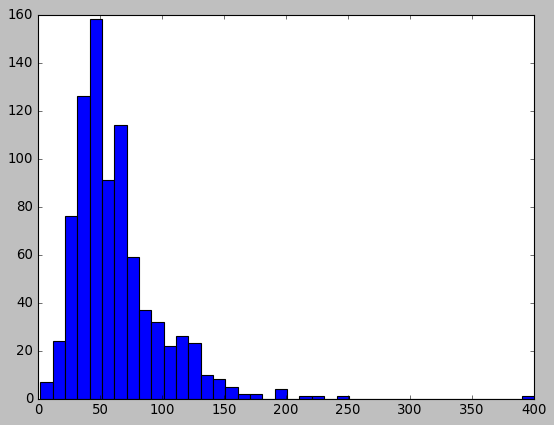

In [96]:
# must consider different currencies

price_list = []

for item in top_brand_df["prices.amountMax"]:
    price_list.append(float(item))

price_list = sorted(price_list)

plt.hist(price_list, bins=40)

In [75]:
top_men_brands = ["nike", "puma", "reebok", "adidas", "new balance"]
top_brand_df = df.query(f'brand.str.lower() == {top_men_brands}')
top_brand_df

,id,asins,brand,...,vin,websiteIDs,weight
26,AVpfB4DRLJeJML43007A,NaN,PUMA,...,NaN,NaN,NaN
27,AVpfB4DRLJeJML43007A,NaN,PUMA,...,NaN,NaN,NaN
39,AVpfEsCZ1cnluZ0-dUFR,NaN,adidas,...,NaN,NaN,NaN
47,AVpfJEMqLJeJML433RvY,NaN,PUMA,...,NaN,NaN,NaN
48,AVpfJEMqLJeJML433RvY,NaN,PUMA,...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19295,AVpf3UceLJeJML43FHT4,NaN,Nike,...,NaN,NaN,NaN
19304,AVpfdHJXLJeJML439gNQ,B0119D7OVE,adidas,...,NaN,NaN,NaN
19305,AVpfdHJXLJeJML439gNQ,B0119D7OVE,adidas,...,NaN,NaN,NaN
19306,AVpf0eG_ilAPnD_xi3cq,NaN,Nike,...,NaN,NaN,NaN


## Niche

In [8]:
import json

index = 0

# example of women shoe description
print(df["descriptions"].dropna().unique()[index])

print("")

# convert dirty data into json format for simplier processing
print(json.loads(df["descriptions"].dropna().unique()[index])[0])

print("")

categories = {
    "sneaker": 0, 
    "boot" : 0, 
    "heel" : 0,
    "sandal" : 0,
    "running": 0,
    "train": 0,
    "flat": 0,
    "loaf": 0,
    "walk": 0,
    "clog": 0,
    "other": 0
}

unknown_cat = []

# identify shoe categories using their URL
for i in range(10000):
    try:
        URL = json.loads(df["descriptions"].dropna().unique()[i])[0]["sourceURLs"][0].lower()
        found = False
        for cat in categories.keys():
            if cat in URL:
                categories[cat] += 1
                found = True
        if not found:
            categories["other"] += 1
            unknown_cat.append(URL)
    except:
        pass
    
print(categories)

[{"dateSeen":["2016-11-11T09:49:00Z"],"sourceURLs":["https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0-Women-US-9-Blue-Sneakers/51270891"],"value":"Important Made in USA Origin Disclaimer: For certain items sold by Walmart on Walmart.com, the displayed country of origin information may not be accurate or consistent with manufacturer information. For updated, accurate country of origin data, it is recommended that you rely on product packaging or manufacturer information. Brand & Style - Zoot TT Trainer 2.0 Width - Medium (B, M) True Color - Green Flash/Atomic Blue/Safety Yellow Outsole Material - Man-Made Heel Height - 1 Inches Brand & Style - Zoot TT Trainer 2.0 Width - Medium (B, M) True Color - Green Flash/Atomic Blue/Safety Yellow Outsole Material - Man-Made Heel Height - 1 Inches Find high-quality Zoot shoes with great prices at our store. We carry the very best shoes, boots, and sandals ranging from dress to casual to athletic while offering fast shipping to almost anywhere in the w

In [68]:
unknown_cat[1202]

'https://www.walmart.com/ip/nike-womens-wmns-roshe-one-winter-brigade-blue-sail-685286-441/162269548'

<BarContainer object of 11 artists>

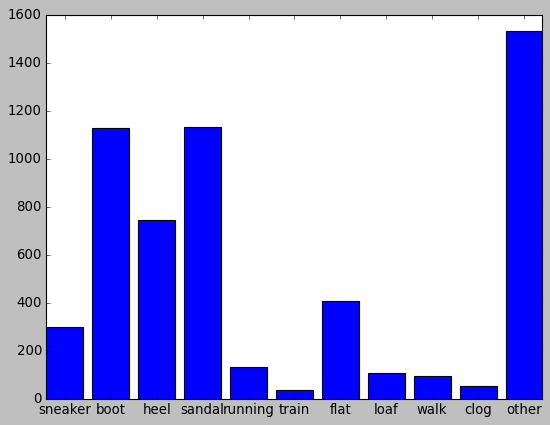

In [9]:
plt.bar(categories.keys(), categories.values())

## Specific Analysis (Nike)

In [46]:
nike_df = df.query('brand.str.lower() == "nike"')
nike_df["prices.amountMax"]

94          88
134        9.5
456        150
477         75
838         70
         ...  
18064    79.98
18080    23.99
18472       75
18793    62.05
18830    51.52
Name: prices.amountMax, Length: 209, dtype: object

In [47]:
npl = []

for item in nike_df["prices.amountMax"]:
    npl.append(float(item))

npl = sorted(npl)

(array([ 4.,  6., 11., 12., 17., 19., 28., 21., 17., 11., 13., 11., 14.,
         5.,  8.,  4.,  0.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([  9.5    ,  19.26225,  29.0245 ,  38.78675,  48.549  ,  58.31125,
         68.0735 ,  77.83575,  87.598  ,  97.36025, 107.1225 , 116.88475,
        126.647  , 136.40925, 146.1715 , 155.93375, 165.696  , 175.45825,
        185.2205 , 194.98275, 204.745  , 214.50725, 224.2695 , 234.03175,
        243.794  , 253.55625, 263.3185 , 273.08075, 282.843  , 292.60525,
        302.3675 , 312.12975, 321.892  , 331.65425, 341.4165 , 351.17875,
        360.941  , 370.70325, 380.4655 , 390.22775, 399.99   ]),
 <BarContainer object of 40 artists>)

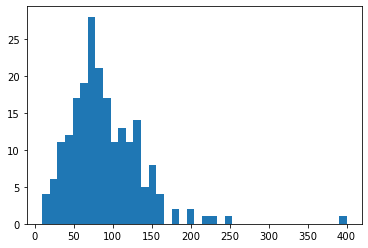

In [53]:
plt.hist(npl, bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce0284cc10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce0285c310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce0284c8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce0285c9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce0285cd30>],
 'means': []}

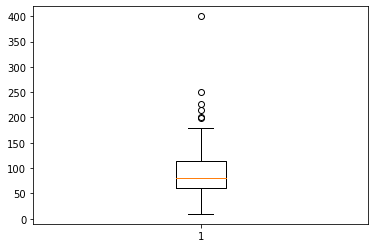

In [49]:
plt.boxplot(npl)